### Matrix Shape 정리
$ X == (N,D) $  
$ W_1 == (D,H) $  
$ b_1 == (H,) $  
$ H == (N,H) $  
$ A == (N,H) $  
$ W_2 == (H,C) $  
$ b_2 == (C,) $  
$ S == (N,C) $  
$ P == (N,C) $  

### Matrix 미분 정리  
$ H = XW + b\qquad  (N, H) = (N, D) \times (D, H) + (H,) $  
$ L = f(H) $  
$ {\partial L \over \partial W} = X^T {\partial L \over \partial H} = {\partial H \over \partial W} \times {\partial L \over \partial H}$  
$ {\partial L \over \partial X} = {\partial L \over \partial H} W^T = {\partial L \over \partial H} \times {\partial H \over \partial X}$  
$ {\partial L \over \partial b} = 1*{\partial L \over \partial H}  $  

### 2 Layers Chain Rule 정리  
##### Forward
$ H = XW_1 + b_1$  
$ A = ReLU(H) $  
$ S = AW_2 + b_2 $  
$ P = Softmax(S) $    
$ L = -LogLikelihood(P) $  
##### Backward  
$ {\partial L \over \partial S} = ? $ : T는 Label  
$ {\partial L \over \partial W_2} = {\partial S \over \partial W_2}{\partial L \over \partial S} = ? $  
$ {\partial L \over \partial b_2} = 1 * {\partial L \over \partial S} = ? $  
$ {\partial L \over \partial A} = {\partial L \over \partial S}{\partial S \over \partial A} = ? $  
$ {\partial L \over \partial H} = ? * {\partial L \over \partial A} $  
$ {\partial L \over \partial W_1} = {\partial H \over \partial W_1}{\partial L \over \partial H} = ? {\partial L \over \partial H}  $  
$ {\partial L \over \partial b_1} = ? $  

### Softmax - Cross Entropy Error미분  
<img src="img/fig a-5.png">

### 데이터 Load  
cifar-10 데이터를 불러옵니다.  
프레임워크 내 자체적으로 데이터를 로드할 수 있지만, 
이렇게도 데이터 로드가 가능합니다!  
32  32  3 차원의 데이터를 3072 차원으로 바뀌는 것 까지 드릴게요.

In [ ]:
from load_cifar_10 import *
import numpy as np
# from Model import TwoLayerNet

In [ ]:
cifar_10_dir = 'cifar-10-batches-py'

train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
load_cifar_10_data(cifar_10_dir)

def Processing_data(train, test):
    #change dtype
    train = np.array(train, dtype=np.float64)
    test = np.array(test, dtype=np.float64)
    
    #Reshaping
    train = np.reshape(train, (train.shape[0], -1))
    test = np.reshape(test, (test.shape[0], -1))
    
    #Normalizing
    mean_image = np.mean(train, axis = 0)
    #print(train.dtype)
    train -= mean_image
    test -= mean_image
    
    return train, test

In [ ]:
train_data, test_data = Processing_data(train_data, test_data)

In [ ]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

너무 많으니까 5000개, 1000개만 사용합시다!

In [ ]:
train_data = train_data[:5000]
train_labels = train_labels[:5000]
test_data = test_data[:1000]
test_labels = test_labels[:1000]

### 데이터 확인  
실제 데이터가 어떻게 생겼는지는 한번 확인해보세요!

In [7]:
train_data

array([[ -71.71074,  -74.05614,  -69.5538 , ...,   -3.63908,  -33.8503 ,
         -42.38186],
       [  23.28926,   40.94386,   54.4462 , ...,   16.36092,    7.1497 ,
          29.61814],
       [ 124.28926,  118.94386,  122.4462 , ...,  -46.63908,  -39.8503 ,
         -30.38186],
       ...,
       [  36.28926,   26.94386,   12.4462 , ...,  -84.63908,  -47.8503 ,
         -30.38186],
       [  23.28926,   15.94386,   -7.5538 , ...,   67.36092,  121.1497 ,
          -0.38186],
       [ -85.71074, -104.05614, -111.5538 , ...,   29.36092,   16.1497 ,
         -14.38186]])

### 하이퍼파라미터 설정  
하이퍼파라미터를 설정하겠습니다.  
hidden_size, epoch_size, batch_size, learning_rate 등은 전부 하이퍼 파라미터이니 바꿔서 해보세요.

In [21]:
input_size = 32 * 32 * 3
hidden_size = 50
output_size = 10
epoch_size = 100
batch_size = 100
learning_rate = 0.0001
N = train_data.shape[0]
M = test_data.shape[0] # 새롭게 추가

### 모델 만들기  
input_size, hidden_size, output_size는 데이터에 맞게 잘 설정해주세요.  
Model.py를 완성시켜주세요.

In [11]:
history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = train_data[batch_mask]
        t_batch = train_labels[batch_mask]
        
        nn.backward(x_batch, t_batch) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(test_data, test_labels))
    history["val_loss"].append(nn.forward(test_data, test_labels))
    
    if i % 10 == 0:
        print(i, "test accuracy :", nn.accuracy(test_data, test_labels))
        print(i, "test loss     :", nn.forward(test_data, test_labels))

0 accuracy : 0.171
0 loss     : 2.1406628764501665
10 accuracy : 0.163
10 loss     : 2.132521142330367
20 accuracy : 0.178
20 loss     : 2.127834313717467
30 accuracy : 0.175
30 loss     : 2.126940992561432
40 accuracy : 0.196
40 loss     : 2.1270442100817353
50 accuracy : 0.201
50 loss     : 2.126811485425397
60 accuracy : 0.214
60 loss     : 2.123276675627253
70 accuracy : 0.216
70 loss     : 2.1163956207716073
80 accuracy : 0.222
80 loss     : 2.109743428823017
90 accuracy : 0.24
90 loss     : 2.102798321451859


### 그림 그리기

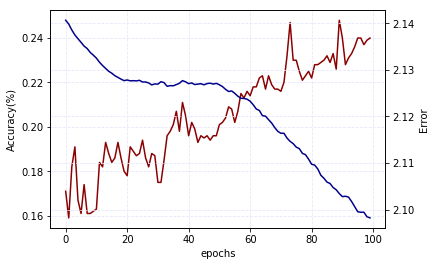

In [12]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

---

# PyTorch

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F

####################
### Model 
###################
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # an affine operation : y = Wx + b
        self.fc1 = nn.Linear(input_size, hidden_size) # input, output
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=3072, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)


In [39]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

In [41]:
history = {'val_acc': [],'val_loss': [], 'train_acc':[], 'train_loss':[]} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    correct = 0
    total = 0
    running_loss = 0
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = torch.FloatTensor(train_data[batch_mask])
        t_batch = torch.LongTensor(train_labels[batch_mask])
        
        # Gradient buffer를 0으로 초기화
        optimizer.zero_grad()
        
        # Forward
        outputs = net(x_batch)
        # Backward
        loss = criterion(outputs, t_batch)
        loss.backward()
        # Update the weights
        optimizer.step()
        
        # Statistics
        _, predicted = torch.max(outputs.data, 1)
        total += t_batch.size(0)
        correct += (predicted == t_batch).sum().item()
        running_loss += loss.item()
        
    acc = 100*correct/total    
    history['train_loss'].append(running_loss / 50)
    history['train_acc'].append(acc)
    
    if i % 10 == 9: # print every 10 epochs 

        print('[%d] loss: %.3f acc: %.3f ' %
              (i + 1, running_loss / 10, acc))
        print('Accuracy of the network on the 50000 train images: %d %%' %  acc)
        running_loss = 0.0

    # Test
    correct = 0
    total = 0
    val_loss = 0

    with torch.no_grad():
        for k in range(M//batch_size):
            batch_mask = np.random.choice(M, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
            x_batch = torch.FloatTensor(test_data[batch_mask])
            t_batch = torch.LongTensor(test_labels[batch_mask])
            
             # Forward
            outputs = net(x_batch)

            # loss
            loss = criterion(outputs, t_batch)
                        
            # Statistics
            _, predicted = torch.max(outputs.data, 1)
            total += t_batch.size(0)
            correct += (predicted == t_batch).sum().item()
            val_loss += loss.item()
        
        #accuracy와 loss를 기록해둡시다.
        acc = 100*correct/total
        history["val_acc"].append(acc)
        history["val_loss"].append(val_loss / 10)
    
        if i % 10 == 9: # print every 10 epochs
            print('[%d] loss: %.3f acc: %.3f ' %
                  (i + 1, val_loss / 10, acc))
            print('Accuracy of the network on the 10000 test images: %d %%' % acc)
            val_loss = 0.0
            
print("")

[10] loss: 14.312 acc: 44.520 
Accuracy of the network on the 50000 train images: 44 %
[10] loss: 5.335 acc: 28.700 
Accuracy of the network on the 10000 test images: 28 %
[20] loss: 8.451 acc: 57.800 
Accuracy of the network on the 50000 train images: 57 %
[20] loss: 5.047 acc: 27.300 
Accuracy of the network on the 10000 test images: 27 %
[30] loss: 5.920 acc: 67.480 
Accuracy of the network on the 50000 train images: 67 %
[30] loss: 4.498 acc: 29.200 
Accuracy of the network on the 10000 test images: 29 %
[40] loss: 4.679 acc: 72.740 
Accuracy of the network on the 50000 train images: 72 %
[40] loss: 5.269 acc: 28.900 
Accuracy of the network on the 10000 test images: 28 %
[50] loss: 3.269 acc: 81.060 
Accuracy of the network on the 50000 train images: 81 %
[50] loss: 4.556 acc: 32.000 
Accuracy of the network on the 10000 test images: 32 %
[60] loss: 2.591 acc: 84.380 
Accuracy of the network on the 50000 train images: 84 %
[60] loss: 4.710 acc: 31.300 
Accuracy of the network on t

In [1]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

NameError: name 'plt' is not defined